### Baseline model with DP

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time  # to time the learning process
import json  # to get the configuration of the environment
from env.simple_road_env import Road
from models.simple_brains import DP
from collections import deque
import math
from utils.logger import Logger

In [2]:
# seed = np.random.seed(0)
plt.rcParams['figure.figsize'] = [20, 10]
np.set_printoptions(formatter={'float': lambda x: f"{x:0.2f}"})

### The environment setup

In [3]:
actions_list = ["no_change", "speed_up", "speed_up_up", "slow_down", "slow_down_down"]
state_features_list = ["position", "velocity"]  # , "obstacle_position"]

# the environment
flag_tkinter = False
initial_state = [0, 3, 12]
goal_velocity = 3
env = Road(flag_tkinter, actions_list, state_features_list, initial_state, goal_velocity)

# getting the configuration of the test
env_configuration = vars(env)
dict_configuration = dict(env_configuration)

# avoid special types:
not_to_consider = ["tk", "children", "canvas", "_tclCommands", "master", "_tkloaded", "colour_action_code",
                   "colour_velocity_code", "origin_coord", "display_canvas", "origin", "_last_child_ids", "rect",
                   "logger"]
for elem in not_to_consider:
    if elem in dict_configuration:
        del dict_configuration[elem]
# saving the configuration in a json
with open('env/simple_road_env_configuration.json', 'w') as outfile:
    json.dump(dict_configuration, outfile)

In [20]:
# -3- Model-Based Dynamic Programming
# Dynamic programming assumes that the agent has full knowledge of the MDP
method_used = "DP"

results_dir = os.path.abspath("/results_dp/")
print(f"results_dir = {results_dir}\n")

brain_agent = DP(actions=actions_list, state=state_features_list, env=env, gamma=0.9)

# check the interface with the environment through specific values
final_state = [19, 3]
final_action = "no_change"
next_observation_dp, reward_dp, termination_flag_dp = brain_agent.get_value_from_state(final_state,
                                                                                       final_action)
action = "no_change"
obstacle_state = [12, 2]
next_observation_dp, reward_dp, termination_flag_dp = brain_agent.get_value_from_state(obstacle_state, action)
print(f" {next_observation_dp}, {reward_dp}, {termination_flag_dp} = results")

results_dir = /results_dp

reset_q_table - self.q_table has shape = (0, 7)
 [14, 2], -3, False = results


In [21]:
# compare value_iteration and policy_iteration
opt_policy_pi, opt_v_table_pi = brain_agent.policy_iteration()

 - 1-th iteration in Policy_Iteration - duration = 0.00 - delta_policy = None
 - 2-th iteration in Policy_Iteration - duration = 1.11 - delta_policy = 40.0
 - 3-th iteration in Policy_Iteration - duration = 3.09 - delta_policy = 57.391009279813645
 - 4-th iteration in Policy_Iteration - duration = 5.09 - delta_policy = 3.6841120000000003
 - 5-th iteration in Policy_Iteration - duration = 7.09 - delta_policy = 0.7039999999999988
Policy_Iteration() stops because of theta_value_function = 0.001
Duration of Policy Iteration = 9.08 - counter = 5 - delta_policy = 0.0


In [22]:
np.save('results_dp/opt_policy_pi.npy', opt_policy_pi)
np.save('results_dp/opt_v_table_pi.npy', opt_v_table_pi)
opt_q_table_pi = brain_agent.q_from_v(opt_v_table_pi)
np.save('results_dp/opt_q_table_pi.npy', opt_q_table_pi)
print(f"results_dp/final_state_values p_i = {opt_q_table_pi[final_state[0]][final_state[1]]}")
print(opt_v_table_pi)
print(opt_q_table_pi)

results_dp/final_state_values p_i = [-inf -42.00 40.00 -42.00 -44.00]
[[-1.09 1.31 3.31 5.31 6.94 4.94]
 [-0.49 1.51 3.51 5.49 6.78 4.78]
 [-0.31 4.56 6.56 8.56 6.91 4.91]
 [2.76 4.76 7.23 9.23 11.23 9.23]
 [2.96 5.43 7.43 9.43 11.05 9.05]
 [6.02 8.85 10.85 12.85 10.87 8.87]
 [7.05 9.05 11.05 12.67 11.01 9.01]
 [10.47 12.47 14.47 13.81 15.81 13.81]
 [10.67 13.61 15.61 17.61 15.61 13.61]
 [15.41 17.41 19.41 17.41 15.41 -26.23]
 [15.61 17.61 19.57 17.57 15.57 -17.30]
 [20.90 22.90 24.90 22.90 20.90 -17.30]
 [21.10 23.10 25.08 23.08 21.08 -17.30]
 [21.28 29.00 31.00 33.00 31.20 29.20]
 [27.20 29.20 31.20 33.00 31.20 29.20]
 [27.40 29.40 31.20 33.00 31.00 29.00]
 [27.40 36.00 38.00 40.00 38.00 36.00]
 [27.40 36.00 38.00 40.00 38.00 36.00]
 [-29.99 36.00 38.00 40.00 38.00 36.00]
 [-40.00 36.00 38.00 40.00 38.00 36.00]]
[[[-1.09 -3.64 -3.98 -inf -inf]
  [1.31 0.91 -1.64 -5.98 -inf]
  [2.94 3.31 2.91 -3.64 -7.98]
  [-inf 4.94 5.31 0.91 -5.64]
  [-inf -inf 6.94 3.31 -1.09]
  [-inf -inf -inf 4.

In [11]:
# opt_policy_pi = np.load('opt_policy_pi.npy')
return_of_episode_pi, trajectory_pi = brain_agent.run_policy(opt_policy_pi, [0, 3])
print(f"p_i has return = {return_of_episode_pi} for trajectory = {trajectory_pi}")

print("\n --- \n")

policy_for_this_state = [1.00 0.00 0.00 0.00 0.00]
q_values_for_this_state = [5.31 4.94 -inf 0.91 -5.64]
action = no_change
 [3, 3], -3, False = results
policy_for_this_state = [0.00 1.00 0.00 0.00 0.00]
q_values_for_this_state = [8.40 9.23 -inf 4.76 -2.11]
action = speed_up
 [7, 4], -5, False = results
policy_for_this_state = [1.00 0.00 0.00 0.00 0.00]
q_values_for_this_state = [15.81 -inf -inf 10.81 10.47]
action = no_change
 [11, 4], -3, False = results
policy_for_this_state = [0.00 0.00 0.00 0.00 1.00]
q_values_for_this_state = [-55.10 -inf -inf -15.30 20.90]
action = slow_down_down
 [13, 2], -7, False = results
policy_for_this_state = [0.00 1.00 0.00 0.00 0.00]
q_values_for_this_state = [25.08 31.00 27.20 21.28 12.15]
action = speed_up
 [16, 3], -5, False = results
policy_for_this_state = [1.00 0.00 0.00 0.00 0.00]
q_values_for_this_state = [40.00 -42.00 -inf 29.20 25.40]
action = no_change
 [19, 3], 40, True = results
return_of_episode = 17
Trajectory = [[0, 3], 'no_change', [3, 

In [12]:
opt_policy_vi, opt_v_table_vi = brain_agent.value_iteration()
np.save('results_dp/opt_policy_vi.npy', opt_policy_vi)
np.save('results_dp/opt_v_table_vi.npy', opt_v_table_vi)
opt_q_table_vi = brain_agent.q_from_v(opt_v_table_vi)
np.save('results_dp/opt_q_table_vi.npy', opt_q_table_vi)
print("results_dp/final_state_values v_i = {}".format(opt_q_table_vi[final_state[0]][final_state[1]]))
print(opt_v_table_vi)
print(opt_q_table_vi)

 - 1-th iteration in Value_Iteration - duration = 0.00 - delta_value_functions = None
 - 2-th iteration in Value_Iteration - duration = 0.63 - delta_value_functions = 47.0
 - 3-th iteration in Value_Iteration - duration = 1.26 - delta_value_functions = 36.0
 - 4-th iteration in Value_Iteration - duration = 1.90 - delta_value_functions = 32.400000000000006
 - 5-th iteration in Value_Iteration - duration = 2.53 - delta_value_functions = 27.702
 - 6-th iteration in Value_Iteration - duration = 3.16 - delta_value_functions = 24.931800000000003
 - 7-th iteration in Value_Iteration - duration = 3.79 - delta_value_functions = 22.438620000000004
 - 8-th iteration in Value_Iteration - duration = 4.42 - delta_value_functions = 12.964460000000006
 - 9-th iteration in Value_Iteration - duration = 5.05 - delta_value_functions = 1.4348906999999986
 - 10-th iteration in Value_Iteration - duration = 5.69 - delta_value_functions = 1.2914016300000029
 - 11-th iteration in Value_Iteration - duration = 6.

In [14]:
return_of_episode_vi, trajectory_vi = brain_agent.run_policy(opt_policy_vi, [0, 3])
print(f"v_i has return = {return_of_episode_vi} for trajectory = {trajectory_vi}")

policy_for_this_state = [1.00 0.00 0.00 0.00 0.00]
q_values_for_this_state = [5.31 4.94 -inf 0.91 -5.64]
action = no_change
 [3, 3], -3, False = results
policy_for_this_state = [0.00 1.00 0.00 0.00 0.00]
q_values_for_this_state = [8.40 9.23 -inf 4.76 -2.11]
action = speed_up
 [7, 4], -5, False = results
policy_for_this_state = [1.00 0.00 0.00 0.00 0.00]
q_values_for_this_state = [15.81 -inf -inf 10.81 10.47]
action = no_change
 [11, 4], -3, False = results
policy_for_this_state = [0.00 0.00 0.00 0.00 1.00]
q_values_for_this_state = [-55.10 -inf -inf -15.30 20.90]
action = slow_down_down
 [13, 2], -7, False = results
policy_for_this_state = [0.00 1.00 0.00 0.00 0.00]
q_values_for_this_state = [25.08 31.00 27.20 21.28 12.15]
action = speed_up
 [16, 3], -5, False = results
policy_for_this_state = [1.00 0.00 0.00 0.00 0.00]
q_values_for_this_state = [40.00 -42.00 -inf 29.20 25.40]
action = no_change
 [19, 3], 40, True = results
return_of_episode = 17
Trajectory = [[0, 3], 'no_change', [3, 

In [ ]:
### Visualizing DP programming based 

In [15]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MultipleLocator
from matplotlib.lines import Line2D

vvi = np.load('results_dp/opt_v_table_vi.npy')
vpi = np.load('results_dp/opt_v_table_pi.npy')
qvi = np.load('results_dp/opt_q_table_vi.npy')
qpi = np.load('results_dp/opt_q_table_pi.npy')
pvi = np.load('results_dp/opt_policy_vi.npy')
ppi = np.load('results_dp/opt_policy_pi.npy')

In [17]:
choice_vi=np.zeros((20, 6))
for p in range(19, 0, -1):
    for v in range(6):
        choice_vi[p][v] = int(np.argmax(qvi[p][v]))

choice_pi=np.zeros((20, 6))
for p in range(20):
    for v in range(6):
        choice_pi[p][v] = int(np.argmax(qpi[p][v]))

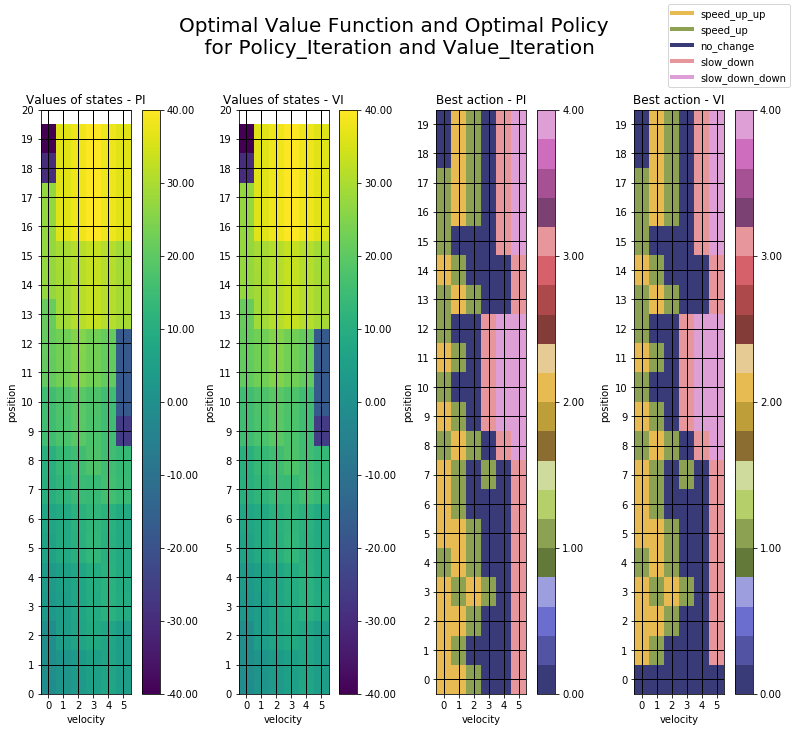

In [19]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(11,10))
fig.suptitle('Optimal Value Function and Optimal Policy \n for Policy_Iteration and Value_Iteration', fontsize=20)
cmap = plt.cm.viridis

# Values
ax1.set_title('Values of states - PI')
im1 = ax1.imshow(vpi, aspect='auto', cmap=cmap)
divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size="20%", pad=0.15)
cbar1 = plt.colorbar(im1, cax=cax1, ticks=MultipleLocator(10), format="%.2f")
ax1.set_ylim(0,20)

ax2.set_title('Values of states - VI')
im2 = ax2.imshow(vvi, aspect='auto', cmap=cmap)
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="20%", pad=0.15)
cbar2 = plt.colorbar(im2, cax=cax2, ticks=MultipleLocator(10), format="%.2f")
ax2.set_ylim(0,20)

cmap = plt.cm.tab20b

# Policies
ax3.set_title('Best action - PI')
# Display image, `aspect='auto'` makes it fill the whole `axes` (ax3)
im3 = ax3.imshow(choice_pi, origin='lower', cmap=cmap, aspect='auto')
# Create divider for existing axes instance
divider3 = make_axes_locatable(ax3)
# Append axes to the right of ax3, with 20% width of ax3
cax3 = divider3.append_axes("right", size="20%", pad=0.15)
# Create colorbar in the appended axes
# Tick locations can be set with the kwarg `ticks`
# and the format of the ticklabels with kwarg `format`
cbar3 = plt.colorbar(im3, cax=cax3, ticks=MultipleLocator(1), format="%.2f")

ax4.set_title('Best action - VI')
im4 = ax4.imshow(choice_vi, origin='lower', cmap=cmap, aspect='auto')
divider4 = make_axes_locatable(ax4)
cax4 = divider4.append_axes("right", size="20%", pad=0.15)
cbar4 = plt.colorbar(im4, cax=cax4, ticks=MultipleLocator(1), format="%.2f")


plt.tight_layout()
# Make space for title
plt.subplots_adjust(top=0.85)

for axis in [ax1, ax2, ax3, ax4]:
    axis.set_xlabel('velocity')
    axis.set_ylabel('position')
    axis.grid(color='k', linestyle='-', linewidth=1)
    axis.yaxis.set_major_locator(MultipleLocator(1))
    axis.xaxis.set_major_locator(MultipleLocator(1))

# legend
custom_lines = [Line2D([0], [0], color=cmap(0.5), lw=4),
                Line2D([0], [0], color=cmap(0.25), lw=4),
                Line2D([0], [0], color=cmap(0), lw=4),
                Line2D([0], [0], color=cmap(0.75), lw=4),
                Line2D([0], [0], color=cmap(1.0), lw=4)
               ]

actions_list = ["speed_up_up", "speed_up", "no_change", "slow_down", "slow_down_down"]
fig.legend(custom_lines, actions_list)

plt.savefig("results_dp/map_values_policies.png", dpi=1000)

plt.show()